In [11]:
data=pd.read_csv('netflix_titles.csv')

In [12]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [25]:
# Check for null values
dt=pd.DataFrame(data)
print(dt.isnull().sum())

# Fill or drop missing data


show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64


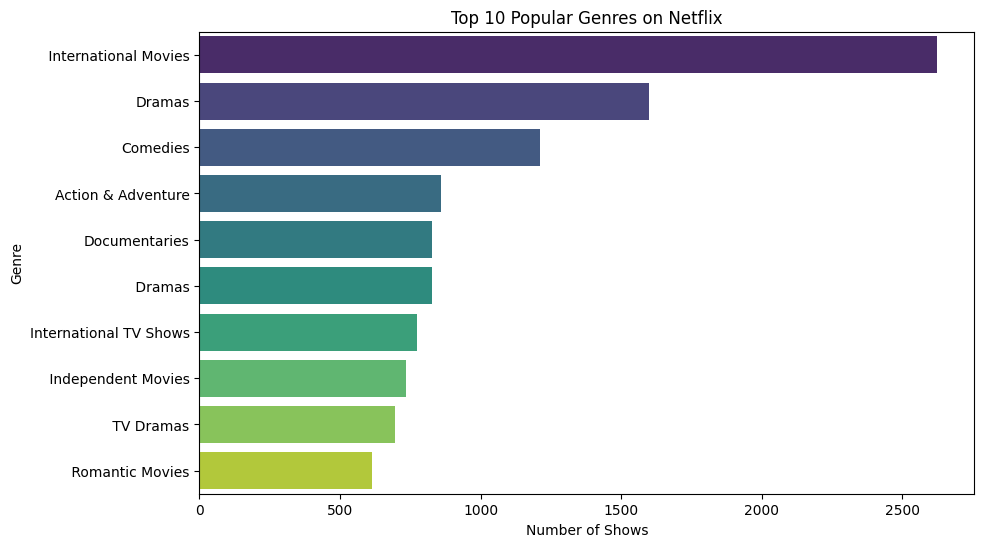

In [27]:
# Split and count genres
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

genre_count = dt['listed_in'].str.split(',').explode().value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(
    x=genre_count.values, 
    y=genre_count.index, 
    hue=genre_count.index, 
    palette='viridis', 
    legend=False
)

plt.title("Top 10 Popular Genres on Netflix")
plt.xlabel("Number of Shows")
plt.ylabel("Genre")
plt.show()


In [11]:


import matplotlib.pyplot as plt
import seaborn as sns

rating_count = dt['rating'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=rating_count.index, y=rating_count.values, palette='coolwarm')
plt.title("Content Rating Distribution on Netflix")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()



NameError: name 'dt' is not defined

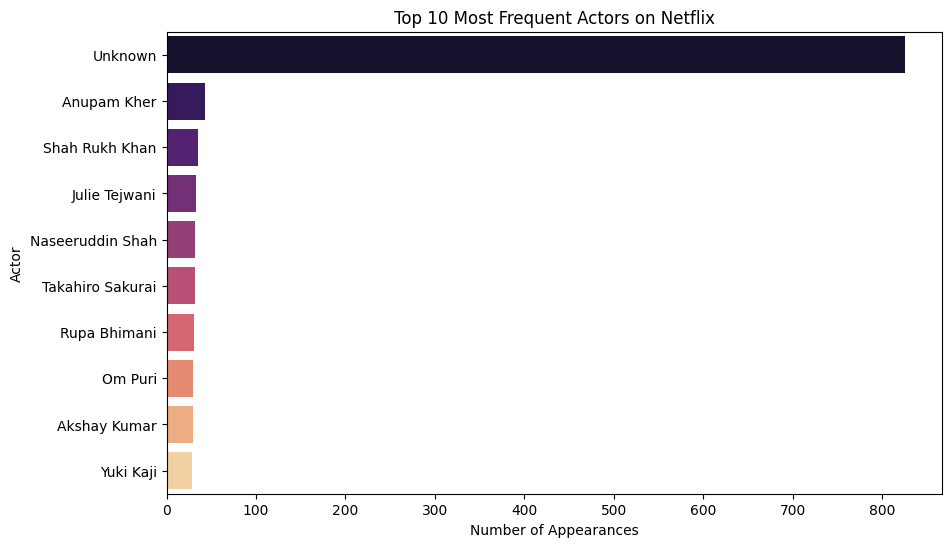

In [32]:
# Extract actor names
actors = dt['cast'].str.split(',').explode().str.strip().value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(y=actors.index, x=actors.values, hue=actors.index, palette='magma', legend=False)
plt.title("Top 10 Most Frequent Actors on Netflix")
plt.xlabel("Number of Appearances")
plt.ylabel("Actor")
plt.show()


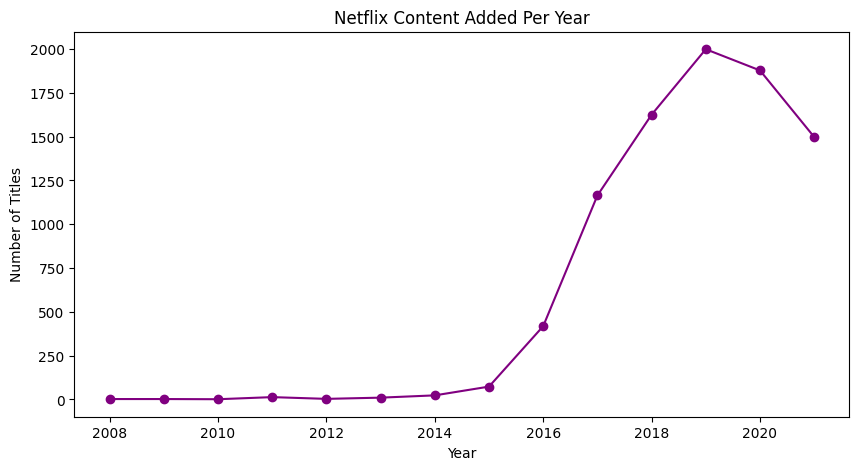

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load data
data = pd.read_csv("netflix_titles.csv")

# Step 2: Convert to datetime safely
data['year_added'] = pd.to_datetime(data['date_added'], errors='coerce').dt.year

# Step 3: Count titles by year
yearly_content = data['year_added'].value_counts().sort_index()

# Step 4: Plot
plt.figure(figsize=(10,5))
plt.plot(yearly_content.index, yearly_content.values, marker='o', color='purple')
plt.title("Netflix Content Added Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()
